In [194]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from wrangle import wrangle

# Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

### For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [2]:
df = wrangle()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store          913000 non-null  int64  
 4   store_address  913000 non-null  object 
 5   store_city     913000 non-null  object 
 6   store_id       913000 non-null  int64  
 7   store_state    913000 non-null  object 
 8   store_zipcode  913000 non-null  int64  
 9   level_0        913000 non-null  int64  
 10  item_brand     913000 non-null  object 
 11  item_id        913000 non-null  int64  
 12  item_name      913000 non-null  object 
 13  item_price     913000 non-null  float64
 14  item_upc12     913000 non-null  int64  
 15  item_upc14     913000 non-null  int64  
 16  month          913000 non-nu

In [7]:
df.head(2)

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,level_0,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,11,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40


In [5]:
# Wrangle will call prepare all the time and it takes time converting the
# date so I saved a copy as sales_prep to local directory.  I commented out the code so it wouldn't 
# create a new csv if I had restart the kernel. 

In [6]:
#df.to_csv('sales_prep.csv')

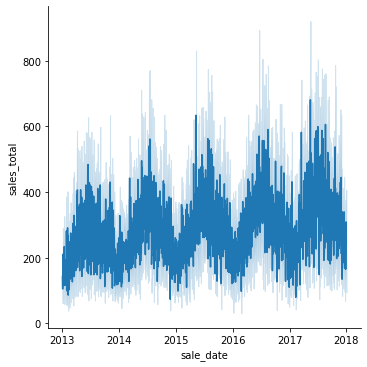

In [22]:
sns.relplot(data=df.sample(25000), x="sale_date", y="sales_total", kind="line")

### Human based

In [38]:
# Based on graph above I want my test to be after 2017

In [36]:
# Creating a sample so I can graph it in my relplot 
sample = df.sample(5000)

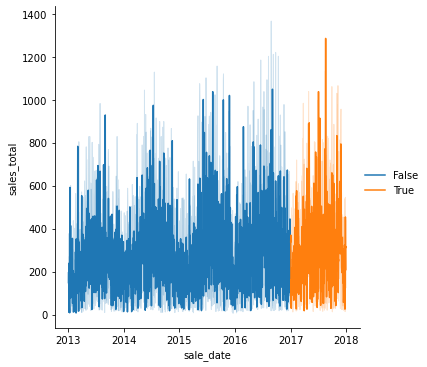

In [37]:
# Graphing my train/test
sns.relplot(data=sample, x="sale_date", y="sales_total", hue=sample.index>'2017-01-01',kind="line")

### Setting up my split

In [39]:
train = df.loc[:'2016']
test = df.loc['2017']

In [51]:
# Checking Shape
train.shape

(730500, (730500, 19))

    730_500 observations is too much to graph so lets create a 10% train sample

In [47]:
# Taking 10% of train and saving to ten_percent
ten_percent = round(len(train)*.10)

In [52]:
# creating train sample using ten_percent
train_sample = train.sample(ten_percent)

In [54]:
# Checking shape of train sample
train_sample.shape

(73050, 19)

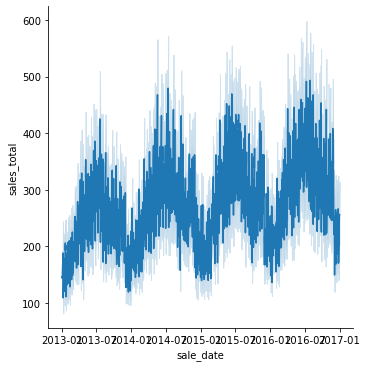

In [56]:
# Graphing my train (10% of it)
sns.relplot(data=train_sample, x="sale_date", y="sales_total",kind="line")

### Plotting train sample by Day, Week, Month, and Year

<AxesSubplot:xlabel='sale_date', ylabel='sales_total'>

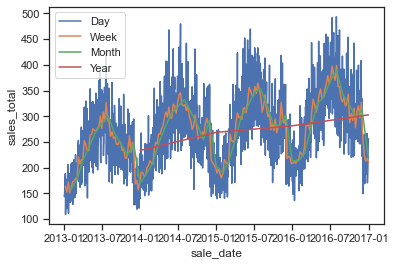

In [100]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(data=train_sample.resample('D').mean(), x="sale_date", y="sales_total", ax=ax, label='Day')
sns.lineplot(data=train_sample.resample('W').mean(), x="sale_date", y="sales_total", ax=ax, label='Week')
sns.lineplot(data=train_sample.resample('M').mean(), x="sale_date", y="sales_total", ax=ax, label='Month')
sns.lineplot(data=train_sample.resample('Y').mean(), x="sale_date", y="sales_total", ax=ax, label='Year')


### Plotting train sample by Daily, Weekly, and Biweekly

<AxesSubplot:xlabel='sale_date', ylabel='sales_total'>

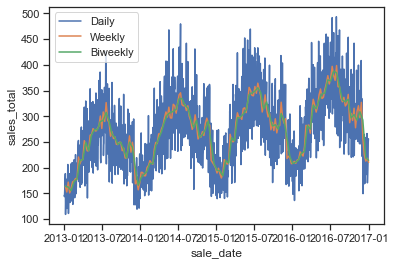

In [101]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(data=train_sample.resample('D').mean(), x="sale_date", y="sales_total", ax=ax, label='Daily')
sns.lineplot(data=train_sample.resample('W').mean(), x="sale_date", y="sales_total", ax=ax, label='Weekly')
sns.lineplot(data=train_sample.resample('2W').mean(), x="sale_date", y="sales_total", ax=ax, label='Biweekly')
#sns.lineplot(data=train_sample.resample('4W').mean(), x="sale_date", y="sales_total", ax=ax, label='Month')

### Bar plot by day of Week

<AxesSubplot:xlabel='sale_date'>

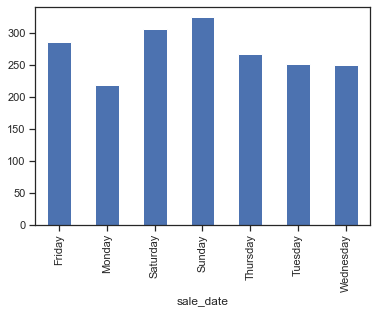

In [87]:
train_sample['sales_total'].groupby(train_sample.index.day_name()).mean().plot.bar()

### Bar plot by month

<AxesSubplot:xlabel='sale_date'>

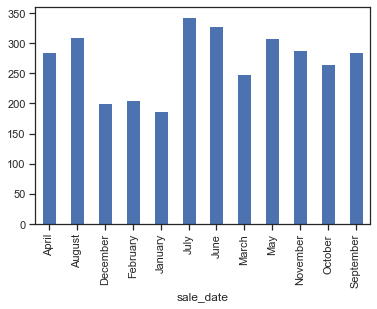

In [89]:
train_sample['sales_total'].groupby(train_sample.index.month_name()).mean().plot.bar()

### Rolling Average biweekly rolling avg, biweekly avg and daily

In [116]:
roll_avg_14 = train_sample.resample('D').mean().rolling(14).mean()

<AxesSubplot:xlabel='sale_date', ylabel='sales_total'>

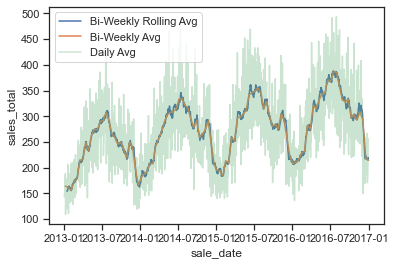

In [130]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(data=roll_avg_14, x="sale_date", y="sales_total", ax=ax, label='Bi-Weekly Rolling Avg')
sns.lineplot(data=train_sample.resample('2W').mean(), x="sale_date", y="sales_total", ax=ax, label='Bi-Weekly Avg')

sns.lineplot(data=train_sample.resample('D').mean(), x="sale_date", y="sales_total", ax=ax, alpha=.3,label='Daily Avg')

### Biweekly Diff, biweekly avg

<AxesSubplot:xlabel='sale_date', ylabel='sales_total'>

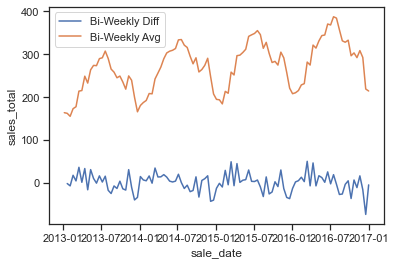

In [133]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(data=train_sample.resample('2W').mean().diff(), x="sale_date", y="sales_total", ax=ax, label='Bi-Weekly Diff')
sns.lineplot(data=train_sample.resample('2W').mean(), x="sale_date", y="sales_total", ax=ax, label='Bi-Weekly Avg')

### 1 Year Diff (26 Bi-Weekly difference)

<AxesSubplot:xlabel='sale_date', ylabel='sales_total'>

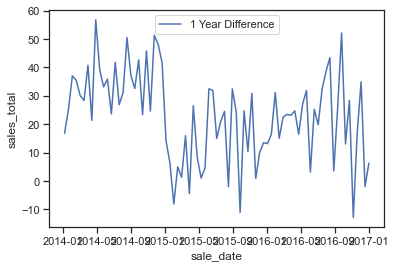

In [149]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(data=train_sample.resample('2W').mean().diff(26), x="sale_date", y="sales_total", ax=ax, label='1 Year Difference')

### 1 Year shift

<AxesSubplot:xlabel='sale_date', ylabel='sales_total'>

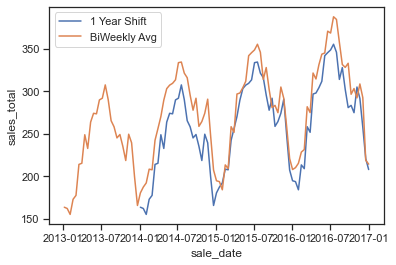

In [152]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(data=train_sample.resample('2W').mean().shift(26), x="sale_date", y="sales_total", ax=ax, label='1 Year Shift')
sns.lineplot(data=train_sample.resample('2W').mean(), x="sale_date", y="sales_total", ax=ax, label='BiWeekly Avg')

In [221]:
s = train_sample['sales_total']
s.head()

sale_date
2016-02-05 00:00:00+00:00    354.83
2014-09-06 00:00:00+00:00     42.72
2015-12-08 00:00:00+00:00    302.40
2015-10-14 00:00:00+00:00     99.63
2014-09-03 00:00:00+00:00     12.60
Name: sales_total, dtype: float64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='t', ylabel='t + 1'>

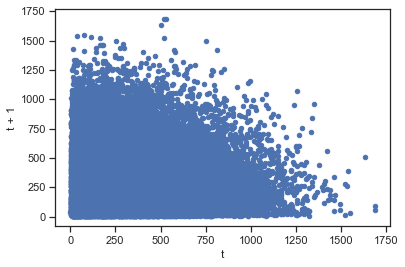

In [179]:
pd.concat([s.rename('t'), s.shift().rename('t + 1')], axis=1).plot.scatter(y='t + 1', x='t')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

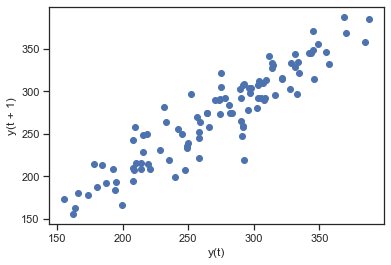

In [189]:
pd.plotting.lag_plot(s.resample('2W').mean(), 1)

In [172]:
def autocorrelation(s, lag):
    return pd.concat([s, s.shift(lag)], axis=1).dropna().corr().iloc[0, 1]

In [184]:
autocorrelation(s.resample('2W').mean(), 1)

0.9243655640926901

In [187]:
autocorr = pd.Series({lag: autocorrelation(s.resample('2W').mean(), lag) for lag in range(1, 365)})

<AxesSubplot:xlabel='lag period', ylabel='autocorrelation'>

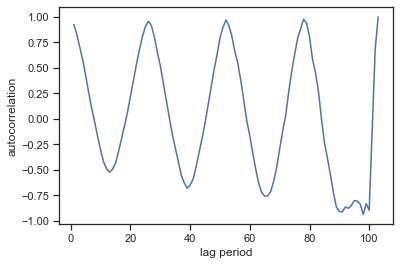

In [188]:
autocorr.plot(xlabel='lag period', ylabel='autocorrelation')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

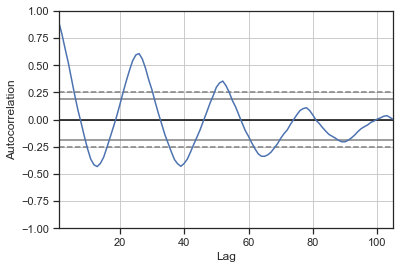

In [190]:
pd.plotting.autocorrelation_plot(s.resample('2W').mean())

<AxesSubplot:xlabel='sale_date'>

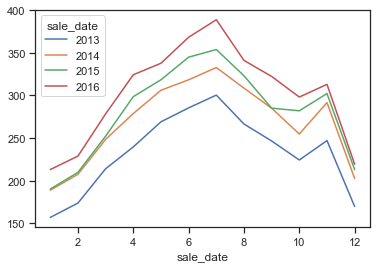

In [191]:
s.groupby([s.index.year, s.index.month]).mean().unstack(0).plot()

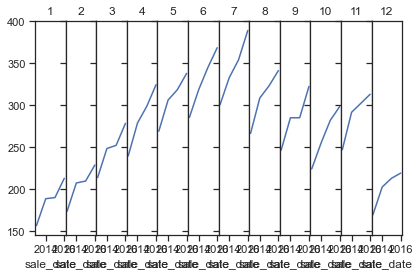

In [192]:
fig, axs = plt.subplots(1, 12, sharex=True, sharey=True)
for ax, (month, x) in zip(axs, s.groupby([s.index.year, s.index.month]).mean().unstack().iteritems()):
    x.plot(ax=ax, title=month)
fig.tight_layout()
fig.subplots_adjust(wspace=0)

## Seasonal Decomposition

In [222]:
# using statsmodels
result = sm.tsa.seasonal_decompose(s.resample('2W').mean(), model='additive')

result = pd.DataFrame(dict(
    observed=result.observed,
    residual=result.resid,
    seasonal=result.seasonal,
    trend=result.trend
))

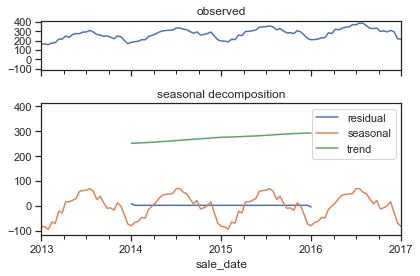

In [208]:
gs = plt.GridSpec(3, 1)
fig = plt.figure()
ax1 = fig.add_subplot(gs[1:])
ax2 = fig.add_subplot(gs[0], sharex=ax1, sharey=ax1)
result.iloc[:, 1:].plot(ax=ax1, title='seasonal decomposition')
result.observed.plot(ax=ax2, title='observed')
fig.tight_layout()

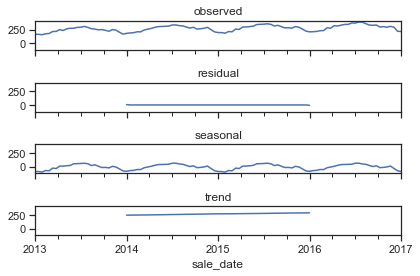

In [209]:
fig, axs = plt.subplots(4, 1, sharex=True, sharey=True)
for ax, (col, x) in zip(axs, result.iteritems()):
    x.plot(ax=ax, title=col)
fig.tight_layout()

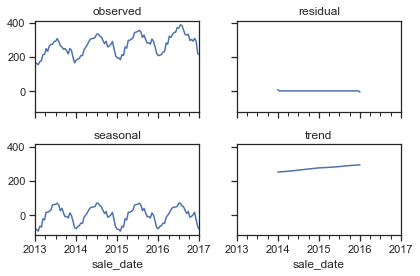

In [213]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
for ax, (col, s) in zip(axs.ravel(), result.iteritems()):
    s.plot(ax=ax, title=col)
fig.tight_layout()

In [216]:
result['combined'] = result.observed + result.residual + result.trend

<ipython-input-218-b874e9464c01>:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


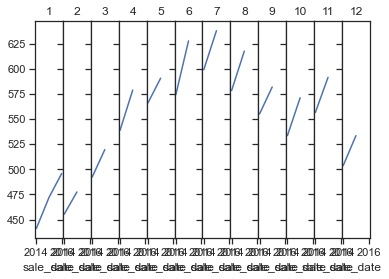

In [218]:
s = result['combined']
fig, axs = plt.subplots(1, 12, sharex=True, sharey=True)
for ax, (month, x) in zip(axs, s.groupby([s.index.year, s.index.month]).mean().unstack().iteritems()):
    x.plot(ax=ax, title=month)
fig.tight_layout()
fig.subplots_adjust(wspace=0)